In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
plt.rcParams['figure.figsize'] = [8, 4.5]

In [2]:
data_root = Path("benchmarks/results/whisper_benchmark")

In [3]:
datasets = {p.stem.removeprefix("NVIDIA"): pd.read_csv(p) for p in data_root.glob("*.csv")}

In [4]:
def prepare_data(datasets):
    for dataset in datasets.values():
        dataset.rename(columns={"time":"Latency [s]", "wer": "WER", "energy": "Energy [kJ]", "model_size": "Model Size"}, inplace=True)
        dataset["1-WER"] = 1 - dataset["WER"]
        dataset["Energy [kJ]"] = dataset["Energy [kJ]"] / 1_000
        dataset["WERDP [s]"] = dataset["Latency [s]"] * dataset["WER"]
        dataset["WERE [kJ]"] = dataset["WER"] * dataset["Energy [kJ]"]
        dataset["WEREDP [kJs]"] = dataset["WER"] * dataset["Energy [kJ]"] * dataset["Latency [s]"]

In [5]:
prepare_data(datasets)

In [6]:
def plot_vars(datasets: dict, x,y,title, annotate=True, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    markers = iter(["o", "^"])
    for gpu, data in datasets.items():
        ax.plot(data[x] ,data[y] , next(markers), label=gpu)
        ax.set_title(title)
        ax.set_xlabel(x)
        ax.set_ylabel(y)
        #plt.ylim(bottom=0)
        ax.legend()
        if annotate:
            max_x = data[x].max()
            min_x = data[x].min()
            for index, size in data["Model Size"].items():
                ax.annotate(size, (data[x][index] + 0.01 * (max_x - min_x) , data[y][index]))   

In [7]:
def plot_latency_vs_wer(datasets: dict, ax=None):
    return plot_vars(datasets, "Latency [s]", "1-WER", "Latency vs. 1-WER",ax=ax)

def plot_energy_vs_wer(datasets: dict, ax=None):
    return plot_vars(datasets, "Energy [kJ]", "1-WER", "Energy vs. 1-WER",ax=ax)

def plot_latency_vs_energy(datasets: dict, ax=None):
    return plot_vars(datasets, "Latency [s]", "Energy [kJ]", "Latency vs. Energy",ax=ax)

In [8]:
def plot_werdp_vs_model_size(datasets, ax =None):
    return plot_vars(datasets, "Model Size", "WERDP [s]", "Word Error Rate Delay Product vs. Model Size", annotate=False, ax=ax)

def plot_werdp_vs_energy(datasets, ax =None):
    return plot_vars(datasets, "Energy [kJ]", "WERDP [s]", "Word Error Rate Delay Product vs. Model Size", annotate=True, ax=ax)

def plot_were_vs_model_size(datasets, ax =None):
    return plot_vars(datasets, "Model Size", "WERE [kJ]", "Word Error Rate Energy vs. Model Size", annotate=False, ax=ax)

def plot_weredp_vs_model_size(datasets, ax =None):
    return plot_vars(datasets, "Model Size", "WEREDP [kJs]", "Word Error Rate Energy Delay Product vs. Model Size", annotate=False, ax=ax)

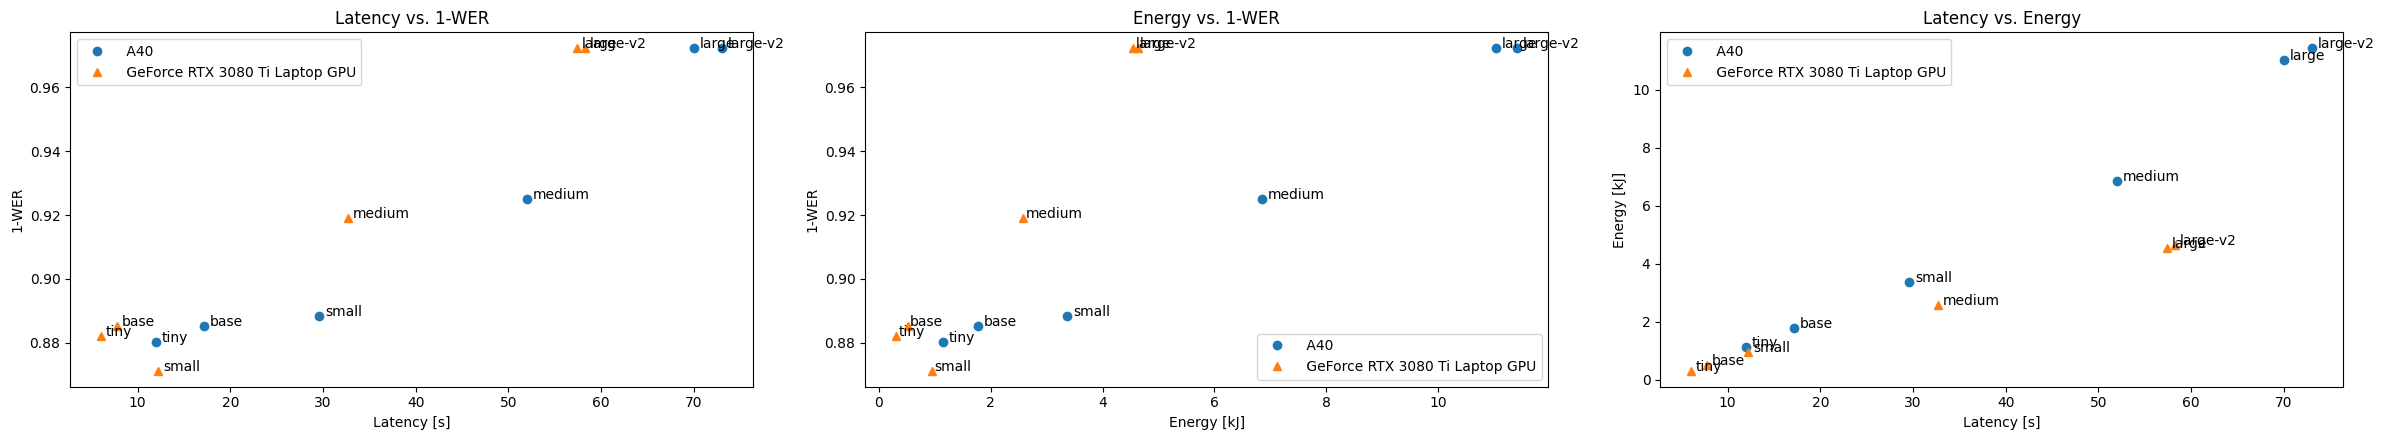

In [9]:
fig, ax = plt.subplots(ncols=3,figsize=(24,4.5))
plot_latency_vs_wer(datasets, ax[0])
plot_energy_vs_wer(datasets,ax[1])
plot_latency_vs_energy(datasets, ax[2])
fig.tight_layout()

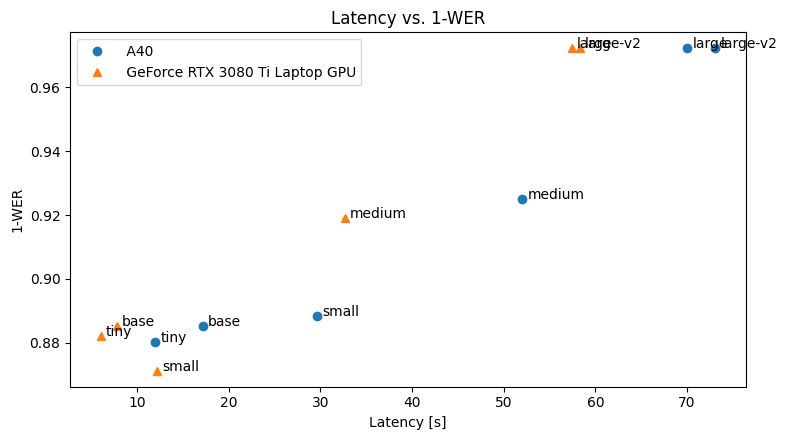

In [17]:
fig, ax = plt.subplots(figsize=(8,4.5))
plot_latency_vs_wer(datasets, ax)
fig.tight_layout()
fig.savefig(ax.get_title().lower().replace(" ","-").replace(".", "-").replace("--", "-")+".pdf")

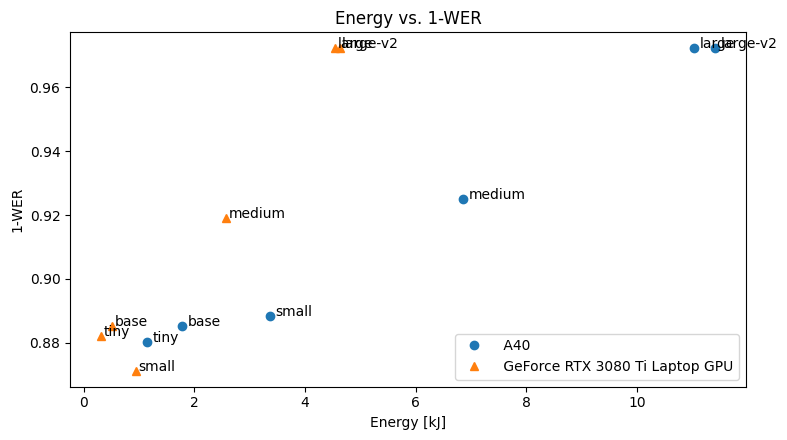

In [18]:
fig, ax = plt.subplots(figsize=(8,4.5))
plot_energy_vs_wer(datasets,ax)
fig.tight_layout()
fig.savefig(ax.get_title().lower().replace(" ","-").replace(".", "-").replace("--", "-")+".pdf")

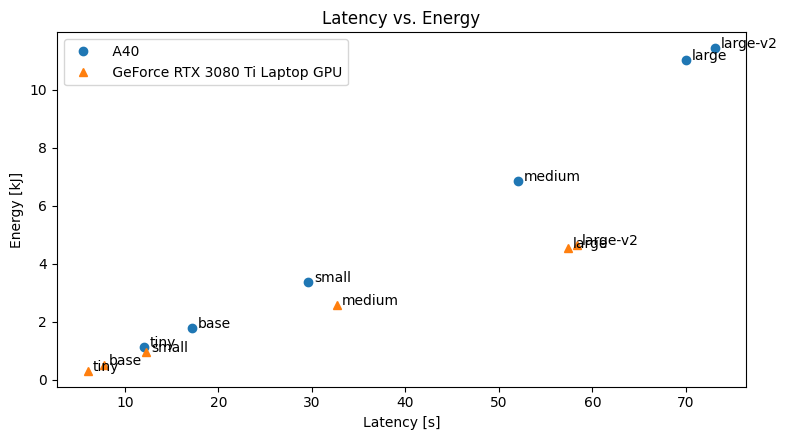

In [19]:
fig, ax = plt.subplots(figsize=(8,4.5))
plot_latency_vs_energy(datasets, ax)
fig.tight_layout()
fig.savefig(ax.get_title().lower().replace(" ","-").replace(".", "-").replace("--", "-")+".pdf")

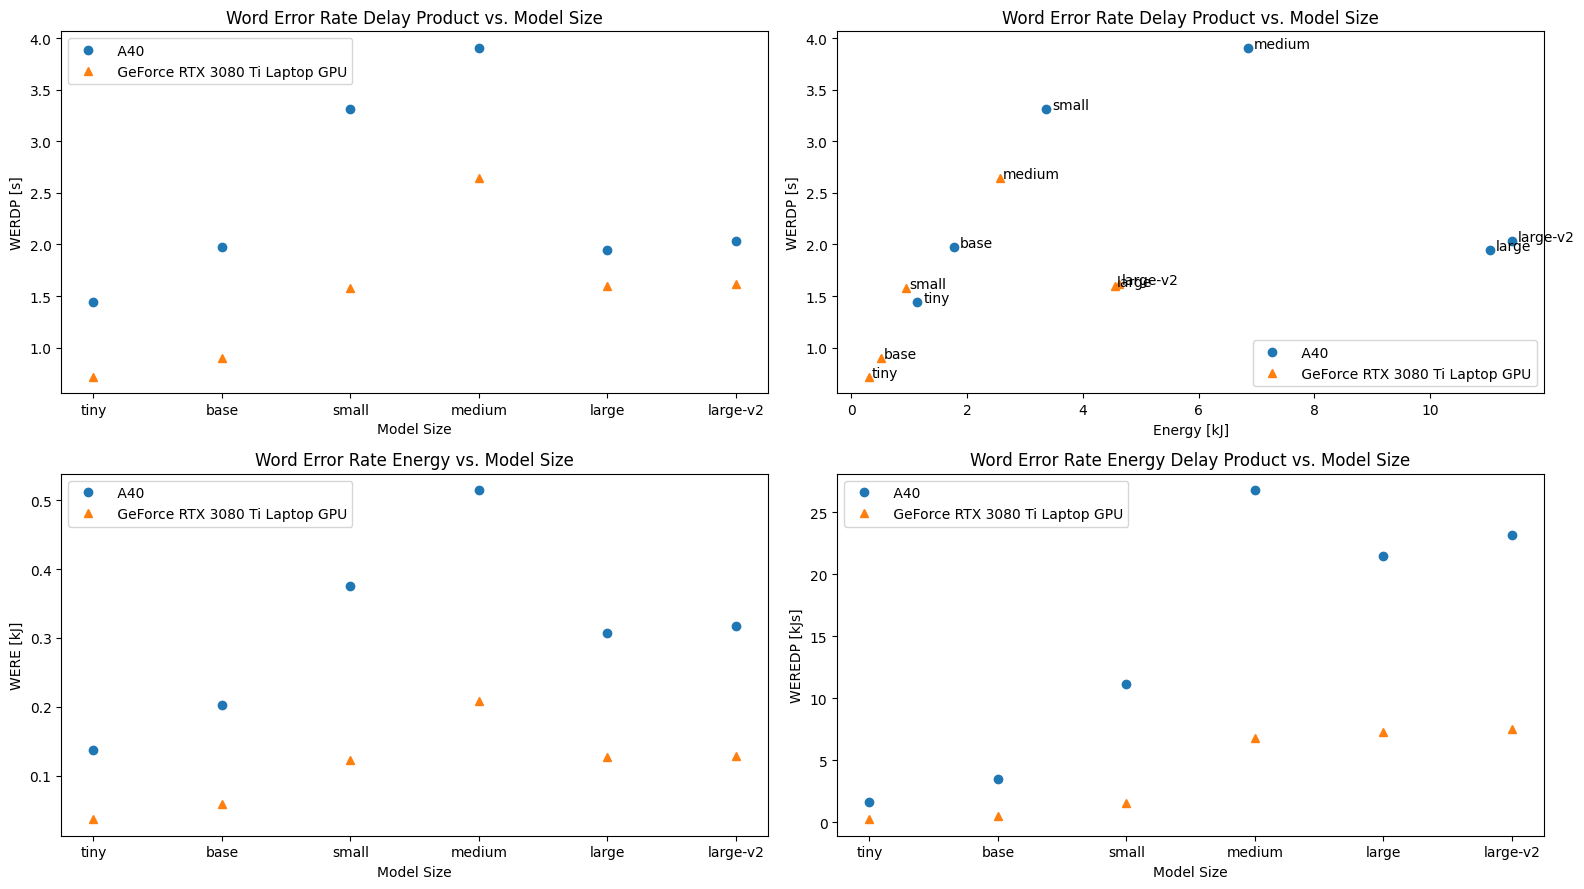

In [142]:
fig, ax = plt.subplots(ncols=2,nrows=2,figsize=(16,9))
plot_werdp_vs_model_size(datasets, ax[0,0])
plot_werdp_vs_energy(datasets, ax[0,1])
plot_were_vs_model_size(datasets, ax[1,0])
plot_weredp_vs_model_size(datasets, ax[1,1])
fig.tight_layout()